# **1. Linear Regression With Outliers**

### Aim :
 To predict the pricing of houses in Melbourne   using regression model


### Objective :
1. To analyse how the model behaves with outliers
2. To check if model is overfit or not
3. If the model is overfit implement regularisation models Lasso and Ridge
4. And check the model perfromance after this

### Dataset : Melbourne housing dataset

### Source : Kaggle

In [ ]:
# Importing required packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
data= pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
data.shape

(34857, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

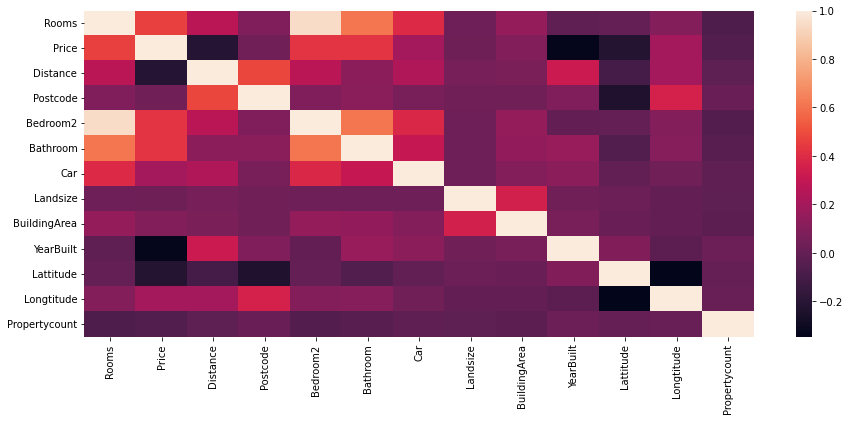

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr())
plt.show()

In [ ]:
# Function to fill missing data for numeric columns
def fillmissing(data):
  import math
  d=math.floor(data.mean())
  data.fillna(d,inplace=True)
  data = data.astype(int)
  print(data.isnull().sum())

In [ ]:
# Function to fill missing data for categorical columns
def fillmissing2(data):
  d=data.mode()[0]
  data.fillna(d,inplace=True)
  print(data.isnull().sum())

In [ ]:
lst=['Rooms','Price',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude','Propertycount']

In [ ]:
lst1=['Suburb', 'Address','Type','Method', 'SellerG',
       'Date','CouncilArea','Regionname']

In [ ]:
for i in lst1:
  fillmissing2(data[i])

0
0
0
0
0
0
0
0


In [ ]:
for i in lst:
  fillmissing(data[i])

0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          34857 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34857 non-null  float64
 9   Postcode       34857 non-null  float64
 10  Bedroom2       34857 non-null  float64
 11  Bathroom       34857 non-null  float64
 12  Car            34857 non-null  float64
 13  Landsize       34857 non-null  float64
 14  BuildingArea   34857 non-null  float64
 15  YearBuilt      34857 non-null  float64
 16  CouncilArea    34857 non-null  object 
 17  Lattitude      34857 non-null  float64
 18  Longti

In [ ]:
# Correlation of our target variable price with other independent variables
data[data.columns[1:]].corr()["Price"][:]

Rooms            0.404908
Price            1.000000
Distance        -0.186847
Postcode         0.040511
Bedroom2         0.331350
Bathroom         0.337517
Car              0.176054
Landsize         0.026469
BuildingArea     0.065321
YearBuilt       -0.200594
Lattitude       -0.049739
Longtitude       0.155606
Propertycount   -0.052934
Name: Price, dtype: float64

In [ ]:
df=data[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance','Bedroom2', 'Bathroom', 'Car','YearBuilt', 'CouncilArea',
       'Longtitude', 'Regionname']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       34857 non-null  object 
 1   Address      34857 non-null  object 
 2   Rooms        34857 non-null  int64  
 3   Type         34857 non-null  object 
 4   Price        34857 non-null  float64
 5   Method       34857 non-null  object 
 6   SellerG      34857 non-null  object 
 7   Date         34857 non-null  object 
 8   Distance     34857 non-null  float64
 9   Bedroom2     34857 non-null  float64
 10  Bathroom     34857 non-null  float64
 11  Car          34857 non-null  float64
 12  YearBuilt    34857 non-null  float64
 13  CouncilArea  34857 non-null  object 
 14  Longtitude   34857 non-null  float64
 15  Regionname   34857 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 4.3+ MB


In [ ]:
dfc=['Rooms','Distance','Bedroom2','Bathroom','Car','Longtitude']

In [ ]:
for i in dfc:
  df[i]=df[i].astype(int)


Countplot of Rooms


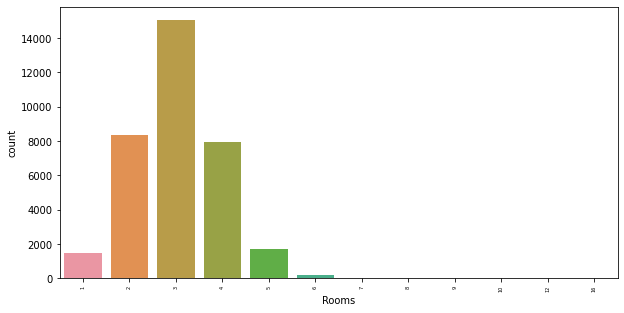

****************
Countplot of Distance


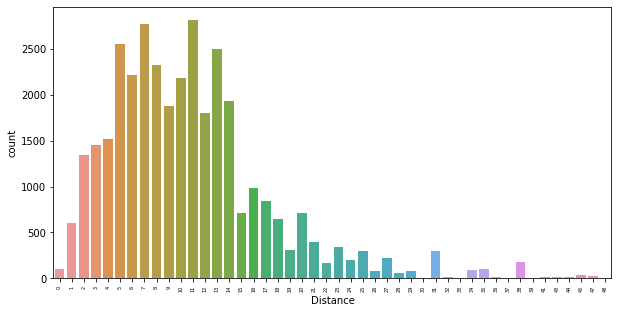

****************
Countplot of Bedroom2


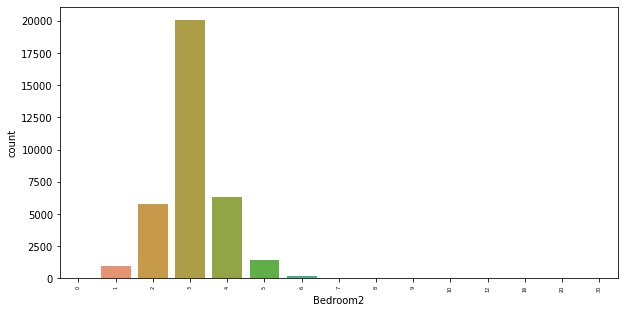

****************
Countplot of Bathroom


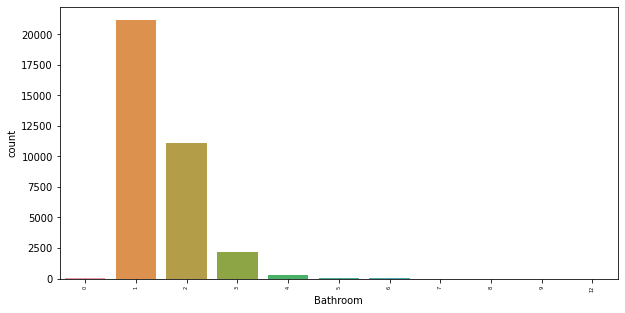

****************
Countplot of Car


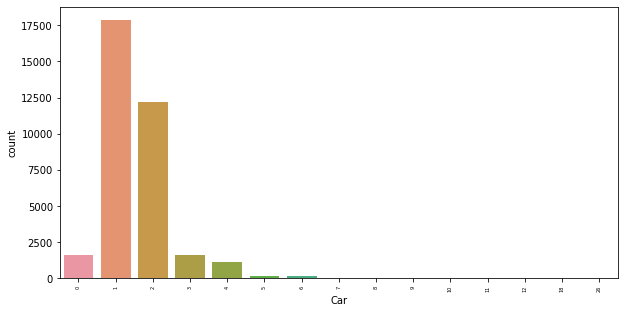

****************
Countplot of Longtitude


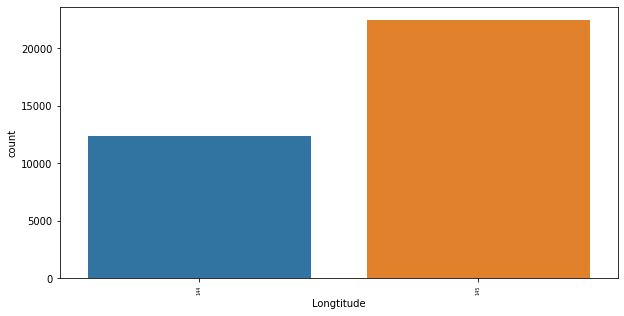

****************


In [ ]:
for i in dfc:

  print("Countplot of",i)
  plt.figure(figsize=(10,5))
  sns.countplot(df[i])

  plt.xticks(fontsize=5, rotation=90)
  plt.show()
  print("****************")

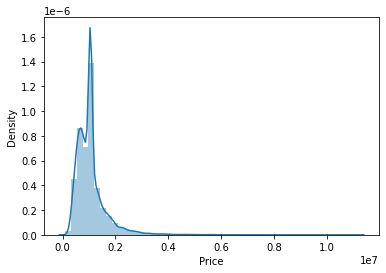

In [ ]:
sns.distplot(df["Price"],kde=True)

In [ ]:
# Selecting our required features
features=['Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt',
      'Longtitude']
x=df.loc[:,features]
y=df.loc[:,'Price']

In [ ]:
# Splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


Score 32.47648024240755

The RMSE Value for train dataset is 462835.48

The RMSE Value for test dataset is 466954.21

R square :  0.32


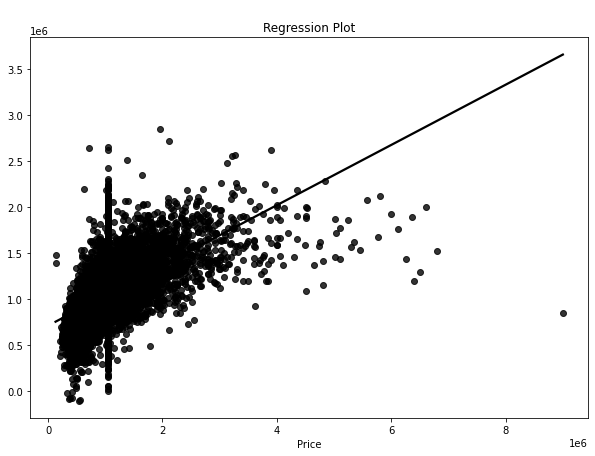

In [ ]:
# Fitting of regression model
reg=LinearRegression(fit_intercept=True,normalize=True)
r=reg.fit(X_train,y_train)
print("\nScore",reg.score(X_test,y_test)*100)
y_pred=reg.predict(X_test)
r_pred_train=(reg.predict(X_train))
print("\nThe RMSE Value for train dataset is",round(np.sqrt(mean_squared_error(
    y_train,r_pred_train)),2))
print("\nThe RMSE Value for test dataset is",round(np.sqrt(mean_squared_error(
    y_test,y_pred)),2))
print("\nR square : ",round(r2_score(y_test,y_pred),2))
plt.figure(figsize=(10,7))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='black')
plt.title("\nRegression Plot")
plt.show()

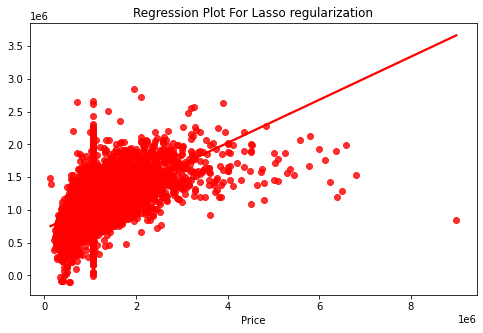


The lasso score for train dataset is 33.0

The lasso score for test dataset is 32.0

The RMSE Value for train dataset is 462835.48

The RMSE Value for test dataset is 466954.21

R square :  0.32


In [ ]:
# Using Lasso regularization
l=Lasso(alpha=0.03)
l.fit(X_train, y_train)
l_pred_train=l.predict(X_train)
l_pred=l.predict(X_test)
plt.figure(figsize=(8,5))
plt.title("Regression Plot For Lasso regularization")
sns.regplot(x=y_test,y=l_pred,ci=None,color ='red')
plt.show()
print("\nThe lasso score for train dataset is",round(l.score(
    X_train,y_train),2)*100)
print("\nThe lasso score for test dataset is",round(l.score(
    X_test,y_test),2)*100)
print("\nThe RMSE Value for train dataset is",round(np.sqrt(
    mean_squared_error(y_train,l_pred_train)),2))
print("\nThe RMSE Value for test dataset is",round(np.sqrt(
    mean_squared_error(y_test,l_pred)),2))
print("\nR square : ",round(r2_score(y_test,l_pred),2))

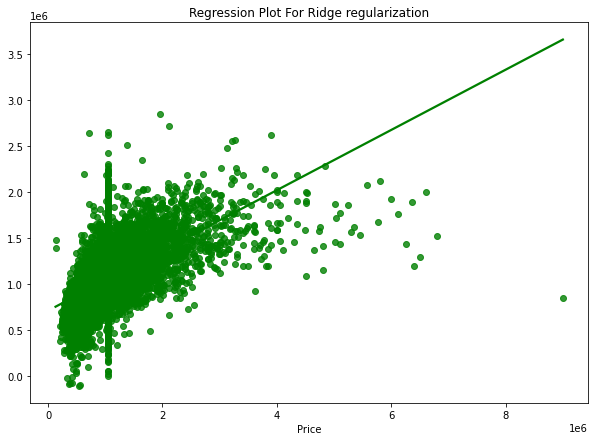

The ridge score for train dataset is 33.0
The ridge score for test dataset is 32.0

The RMSE Value for train dataset is 462835.48

The RMSE Value for test dataset is 466954.21

R square :  0.32


In [ ]:
# Using Ridge regularization
m=Ridge(alpha=0.01)
m.fit(X_train , y_train)
m_pred_train=m.predict(X_train)
m_pred=m.predict(X_test)
plt.figure(figsize=(10,7))
plt.title("Regression Plot For Ridge regularization")
sns.regplot(x=y_test,y=m_pred,ci=None,color ='green')
plt.show()
print("The ridge score for train dataset is",round(m.score(
    X_train,y_train),2)*100)
print("The ridge score for test dataset is",round(m.score(
    X_test , y_test),2)*100)
print("\nThe RMSE Value for train dataset is",round(np.sqrt(
    mean_squared_error(y_train,m_pred_train)),2))
print("\nThe RMSE Value for test dataset is",round(np.sqrt(
    mean_squared_error(y_test,m_pred)),2))
print("\nR square : ",round(r2_score(y_test,m_pred),2))

# Conclusion
### We see that the difference between our train error and test error is minimum therfore we can say that our model is balanced.
### Since our linear regression model is balanced there is no difference in using lasso and ridge regularization to improve our model learning.
### Our R square error is 0.32 which means that only 34% variability observed in the target variable is explained by our model.
### This might be because of outliers available in the data. So we will have to treat the outliers and check our model performance.